# **Regional Planning:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

The SOUTHERN CONFEDERATION OF KIBBUTZIM is a group of three kibbutzim (communal farming communities). Overall planning for this group is done in its Coordinating Technical Office. This office currently is planning agricultural production for the coming year.

The agricultural output of each kibbutz is limited by both the amount of available irrigable land and the quantity of water allocated for irrigation by the Water Commissioner (a national government official). These data are given in Table 3.8.

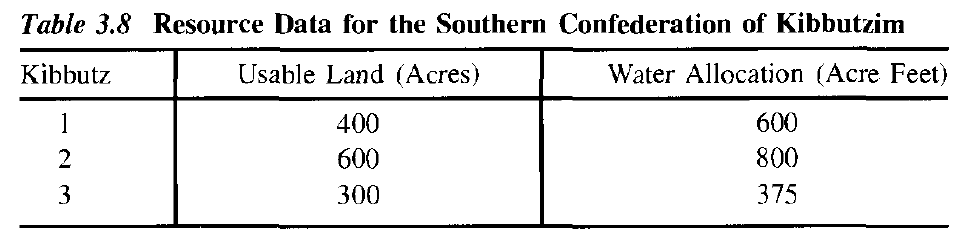

The crops suited for this region include sugar beets, cotton, and sorghum, and these are the three being considered for the upcoming season. These crops differ primarily in their expected net return per acre and their consumption of water. In addition, the Ministry of Agriculture has set a maximum quota for the total acreage that can be devoted to each of these crops by the Southern Confederation of Kibbutzim, as shown in Table 3.9.

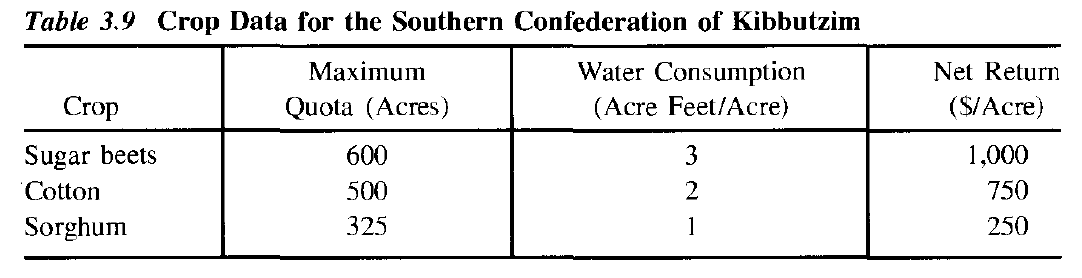

Because of the limited water available for irrigation, the Southern Confederation of Kibbutzim will not be able to use all its irrigable land for planting crops in the upcoming season. To ensure equity between the three kibbutzim, it has been agreed that every kibbutz will plant the same proportion of its available irrigable land. For example, if kibbutz $1$ plants $200$ of its available $400$ acres, then kibbutz $2$ must plant $300$ of its $600$ acres, while kibbutz $3$ plants $150$ acres of its $300$ acres. However, any combination of the crops may be grown at any of the kibbutzim. The job facing the Coordinating Technical Office is to plan how many acres to devote to each crop at the respective kibbutzim while satisfying the given restrictions. The objective is to maximize the total net return to the Southern Confederation of Kibbutzim as a whole.

**Modeling:**

$x_{ij} \ $   for $\  i={sugar\ beets, cotton, sorghum} \ $  and $\ j={1,2,3}$

$i$ represents crops and $j$ represents kibbutz.

$\\ $

$Objective\ Function:\\ $

$Max\ Z = 1000(x_{11}+x_{12}+x_{13})+ 750(x_{21}+x_{22}+x_{23})+ 250(x_{31}+x_{32}+x_{33})$

$\\ $

$Constraints:\\ $

1. Usable lands for each kibbutz:

$x_{11}+x_{21}+x_{31} \leq 400$

$x_{12}+x_{22}+x_{32} \leq 600$

$x_{13}+x_{23}+x_{33} \leq 300$

2. Water allocation for each kibbutz:

$x_{11}+x_{21}+x_{31} \leq 600$

$x_{12}+x_{22}+x_{32} \leq 800$

$x_{13}+x_{23}+x_{33} \leq 375$

3. Total acreage for each crop:

$x_{11}+x_{12}+x_{13} \leq 600$

$x_{21}+x_{22}+x_{23} \leq 500$

$x_{31}+x_{32}+x_{33} \leq 325$

4. Equal proportion of land planted:

$\frac{x_{11}+x_{21}+x_{31}}{400}=\frac{x_{12}+x_{22}+x_{32}}{600}$

$\frac{x_{12}+x_{22}+x_{32}}{600}=\frac{x_{13}+x_{23}+x_{33}}{300}$

$\frac{x_{13}+x_{23}+x_{33}}{300}=\frac{x_{11}+x_{21}+x_{31}}{400}$

5. Nonnegativity:

$x_{ij} \geq 0$

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining the problem

crop = ['sugar beets', 'cotton', 'sorghum']
kibbutz = [1, 2, 3]
water = {'sugar beets':3, 'cotton':2, 'sorghum':1}

In [3]:
#Defining Variables

x = LpVariable.dicts('x', ((c, k) for c in crop for k in kibbutz), lowBound=0, cat='Continuous')

In [4]:
x

{('sugar beets', 1): x_('sugar_beets',_1),
 ('sugar beets', 2): x_('sugar_beets',_2),
 ('sugar beets', 3): x_('sugar_beets',_3),
 ('cotton', 1): x_('cotton',_1),
 ('cotton', 2): x_('cotton',_2),
 ('cotton', 3): x_('cotton',_3),
 ('sorghum', 1): x_('sorghum',_1),
 ('sorghum', 2): x_('sorghum',_2),
 ('sorghum', 3): x_('sorghum',_3)}

In [5]:
#Defining Objective Function

Model = LpProblem('Model', LpMaximize)

Model += 1000*(lpSum(x['sugar beets', j] for j in kibbutz)) + 750*(lpSum(x['cotton', j] for j in kibbutz)) + 250*(lpSum(x['sorghum', j] for j in kibbutz))

In [6]:
#Constraints

#1. Usable lands for each kibbutz:
Model += lpSum(x[i, 1] for i in crop) <= 400
Model += lpSum(x[i, 2] for i in crop) <= 600
Model += lpSum(x[i, 3] for i in crop) <= 300

#2. Water allocation for each kibbutz:
Model += lpSum(water[i]*x[i, 1] for i in crop) <= 600
Model += lpSum(water[i]*x[i, 2] for i in crop) <= 800
Model += lpSum(water[i]*x[i, 3] for i in crop) <= 375

#3. Total acreage for each crop:
Model += lpSum(x['sugar beets', j] for j in kibbutz) <= 600
Model += lpSum(x['cotton', j] for j in kibbutz) <= 500
Model += lpSum(x['sorghum', j] for j in kibbutz) <= 325

#4. Equal proportion of land planted:
Model += (lpSum(x[i,1] for i in crop))/400 == (lpSum(x[i,2] for i in crop))/600
Model += (lpSum(x[i,2] for i in crop))/600 == (lpSum(x[i,3] for i in crop))/300
Model += (lpSum(x[i,3] for i in crop))/300 == (lpSum(x[i,1] for i in crop))/400

In [7]:
#Model summary

Model

Model:
MAXIMIZE
750*x_('cotton',_1) + 750*x_('cotton',_2) + 750*x_('cotton',_3) + 250*x_('sorghum',_1) + 250*x_('sorghum',_2) + 250*x_('sorghum',_3) + 1000*x_('sugar_beets',_1) + 1000*x_('sugar_beets',_2) + 1000*x_('sugar_beets',_3) + 0
SUBJECT TO
_C1: x_('cotton',_1) + x_('sorghum',_1) + x_('sugar_beets',_1) <= 400

_C2: x_('cotton',_2) + x_('sorghum',_2) + x_('sugar_beets',_2) <= 600

_C3: x_('cotton',_3) + x_('sorghum',_3) + x_('sugar_beets',_3) <= 300

_C4: 2 x_('cotton',_1) + x_('sorghum',_1) + 3 x_('sugar_beets',_1) <= 600

_C5: 2 x_('cotton',_2) + x_('sorghum',_2) + 3 x_('sugar_beets',_2) <= 800

_C6: 2 x_('cotton',_3) + x_('sorghum',_3) + 3 x_('sugar_beets',_3) <= 375

_C7: x_('sugar_beets',_1) + x_('sugar_beets',_2) + x_('sugar_beets',_3) <= 600

_C8: x_('cotton',_1) + x_('cotton',_2) + x_('cotton',_3) <= 500

_C9: x_('sorghum',_1) + x_('sorghum',_2) + x_('sorghum',_3) <= 325

_C10: 0.0025 x_('cotton',_1) - 0.00166666666667 x_('cotton',_2)
 + 0.0025 x_('sorghum',_1) - 0.001666

In [8]:
#Solving model

Model.solve()
print('Optimal Solution:', pulp.value(Model.objective))

Optimal Solution: 633333.33


In [9]:
for variables in Model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_('cotton',_1):100.0
x_('cotton',_2):250.0
x_('cotton',_3):150.0
x_('sorghum',_1):0.0
x_('sorghum',_2):0.0
x_('sorghum',_3):0.0
x_('sugar_beets',_1):133.33333
x_('sugar_beets',_2):100.0
x_('sugar_beets',_3):25.0


In [10]:
VNames = []
for variables in Model.variables():
  VNames.append(variables.name)

VValue = []
for variables in Model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,"x_('cotton',_1)",100.00
2,"x_('cotton',_2)",250.00
3,"x_('cotton',_3)",150.00
4,"x_('sorghum',_1)",0.00
5,"x_('sorghum',_2)",0.00
6,"x_('sorghum',_3)",0.00
7,"x_('sugar_beets',_1)",133.33
8,"x_('sugar_beets',_2)",100.00
9,"x_('sugar_beets',_3)",25.00


In [11]:
print('Current Status: ', LpStatus[Model.status])

Current Status:  Optimal
